In [216]:
#This program generates FIG. 4B & 5C,D,E,F
#Fig4B: Perturbation matrix in different FB conditions
#Fig5B: Perturbation matrix in  FF + FB condition
#Fig5D,E,F: Comparison between perturbation matrices in different conditions

In [217]:
#Import some libraries 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

In [218]:
#Importing some info I need 
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

#Print Some information about the mdodel
print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")


The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [219]:
#------------------------------------------------------------------------------
# Import the files 
#------------------------------------------------------------------------------

#This funciton takes the name of the folder and import all the spike data 
#The function returns the number of spikes for each group of neurons 

def take_files(a):
    
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [220]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups 
#------------------------------------------------------------------------------

#Funciton to compute the mean firing rates for all the neuron groups given the number spikes 
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    tot_sp_vip1 =  S_vip1num_spikes  #Layer 2/3
    rate_vip1= tot_sp_vip1/(N1*runtime)

    print("runtime: %s" %runtime)
    tot_sp_e23 =  S_e23num_spikes  #Layer 2/3
    #print(tot_sp_e23)
    #print(tot_sp_e23)
    #print(N[0][0])
    # Total number of spikes and rate for each group:
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)
    #print(tot_sp_vip23)

    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)

    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)


    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6


In [313]:
#Define the files containing the needed data 

#This is for the Spontanous case (Fig 2A)
#folder_state='../simulations_data/In_spontaneuous/i_none/Sp_0'
#folder_input='../simulations_data/In_spontaneuous/i16/Sp_1'

#This is for the FF case (Fig 2B)
# folder_state='../simulations_data/In_with_e4/i_input4/Sp_1'
# folder_input='../simulations_data/In_with_e4/i1/Sp_1'



#folder_input='../simulations_data/Sp_input_ff25_5pv_150' #FF input              #Fig. 1D
#folder_input='../simulations_data/Sp_input_ff25_5pv_170' #FF input              #Fig. 1D
#folder_input='../simulations_data/Sp_input_fb25_5pv_170' #FF input              #Fig. 1D


#SPONTANOUS with and without probability changed
#folder_state='../simulations_data/REVISIONS/Sp_input_e4_0pA_e5_0pA'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged0.6_e4_0pA25%_e5_0pA_25%'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged1.4_e4_0pA100%_e5_0pA_25%'


#EVOKED with and without probability changed

#folder_state='../simulations_data/REVISIONS/Sp_input_e4_30pA100%_e5_0pA_25%'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged0.6_e4_30pA100%_e5_0pA_25%'

#Evoked 150 to 25%
#folder_state='../simulations_data/REVISIONS/Sp_input_e4_150pA25%_e5_0pA_25%'


#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged60_e4_30pA100%_e5_0pA_25%' #FF 

#REVISIONS_1 #final simulations 
#folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_0pA_e6_0pA" #spontfolder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_0pA_e6_150pA" #input L6
#folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_150pA_e6_0pA" #input L2/3
#folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_0pA_e6_150pA" #input L6

# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_0pA_e6_0pA" #input L5
#folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_150pA_e6_0pA" #input L5, L2/3
#folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_150pA_e6_150pA" #input L5, L2/3, L6

#folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_150pA_e5_0pA_e23_0pA_e6_0pA" #input to L4
#folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_150pA25%_e5_150pA_25%" #input to L4 & L5 

folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_150pA_e5_150pA_e23_0pA_e6_0pA" #input L5, L2/3


#folder_input = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23" #spont
#folder_input ="../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_150pA_e6_0pA/e23" #L23

#folder_input ="../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_0pA_e6_150pA/e23" #L6

#folder_input ="../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_150pA_e23_150pA_e6_0pA/e23" #L23 L5
#folder_input ="../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_150pA_e23_150pA_e6_150pA/e23" #L23 L5 L6

folder_input ="../simulations_data/REVISIONS_1/Sim_e4_150pA_e5_150pA_pert_30pA/e23" #L4 L5


In [314]:
# Import the files in which no input is given, spontaneous activity 
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0=take_files(folder_state)

#Compute the mean firing rates for all the populations
rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0=compute_FR(N,N1,runtime,
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,
S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,
S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,
S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 3.263889
rate_e23: 0.220334 rate_pv23: 9.220513 rate_sst23: 6.510638 rate_vip23: 18.566978
rate_e4: 16.920792 rate_pv4: 14.894558 rate_sst4: 2.289308 rate_vip4: 8.197531
rate_e5: 14.622582 rate_pv5: 14.613757 rate_sst5: 5.869048 rate_vip5: 20.909091
rate_e6: 2.544735 rate_pv6: 20.617647 rate_sst6: 7.395425 rate_vip6: 7.982456


In [315]:
# Import the files in which input is given to one population (30pA)
S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_input)

#Compute the rates
rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 3.322917
rate_e23: 4.106526 rate_pv23: 11.569231 rate_sst23: 8.290780 rate_vip23: 24.996885
rate_e4: 16.752475 rate_pv4: 18.282313 rate_sst4: 2.754717 rate_vip4: 12.703704
rate_e5: 15.271705 rate_pv5: 16.476190 rate_sst5: 7.291667 rate_vip5: 20.030303
rate_e6: 2.342571 rate_pv6: 20.843137 rate_sst6: 7.218954 rate_vip6: 8.017544


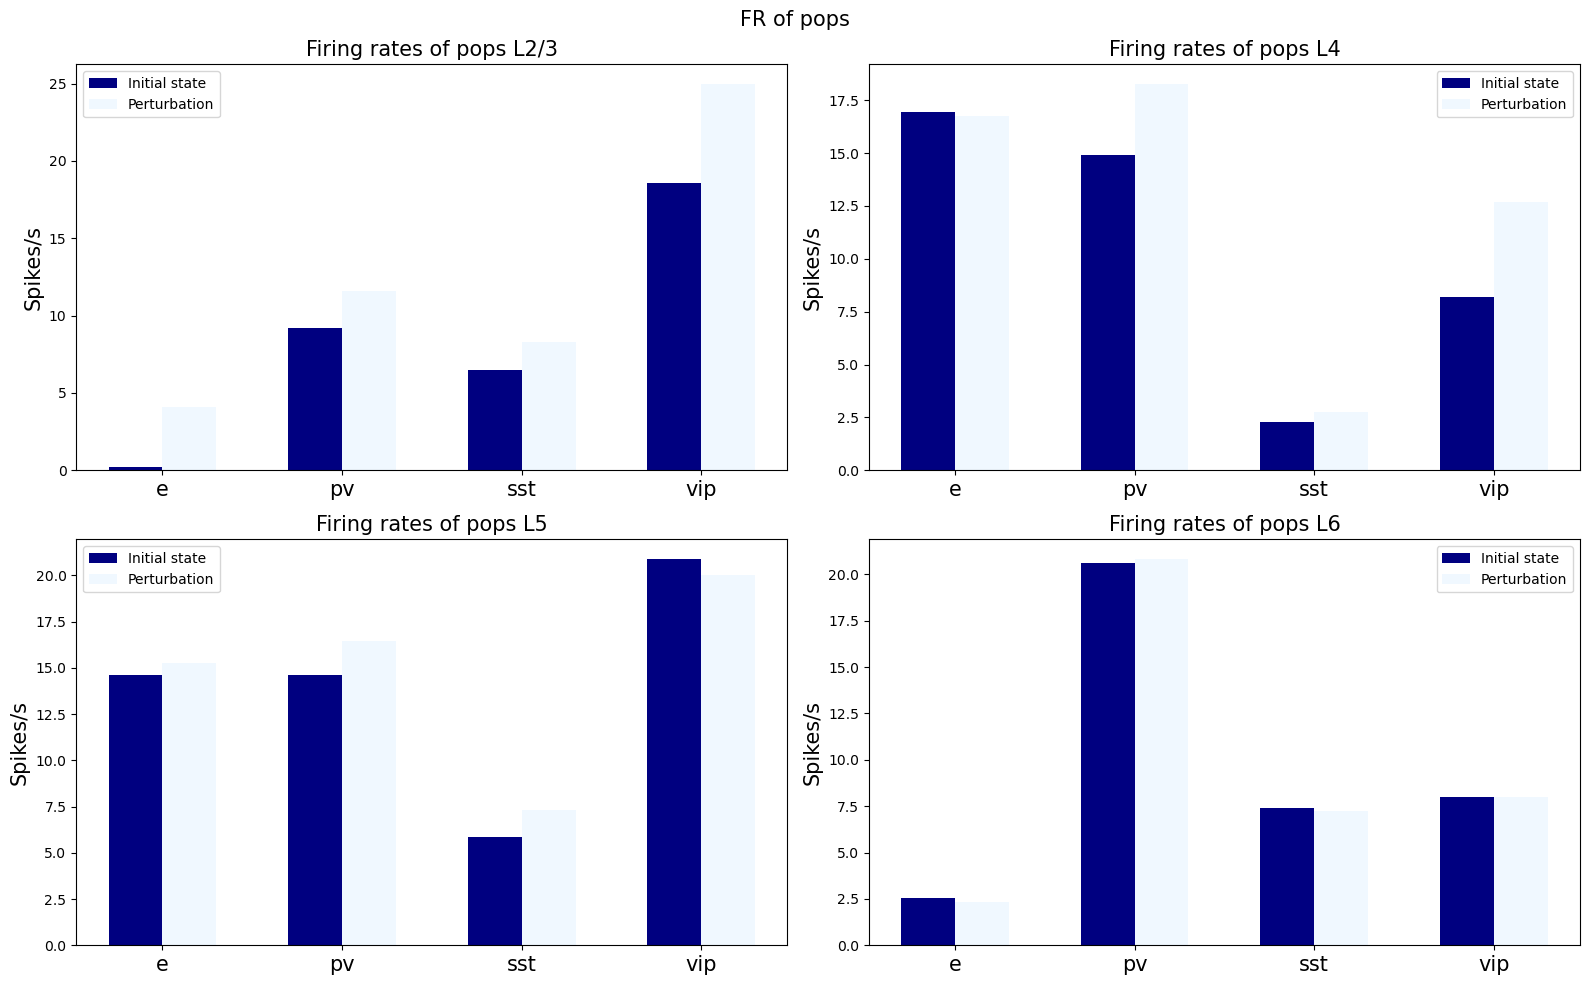

In [316]:
#Plot of firing rates of one particular situation where the perturbative input is given to one population
#in comparison with case without the input

#Data to plot
#Firing rates with the input
model_means23 = [rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1]
model_means4= [rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1]
model_means5= [rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1]
model_means6 = [rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1]

#Firinr rates without the input
base_means23 = [rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0]
base_means4= [rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0]
base_means5= [rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0]
base_means6 = [rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0]


#Lables for the plot 
labels = ['e','pv', 'sst', 'vip']
x = np.arange(len(labels))  # the label locations
w = 0.3  # the width of the bars
width=0.3

#Create the plot
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(16,10))

f.suptitle('FR of pops',fontsize=15)
rects1_23 = ax1.bar(x - width/2, base_means23, width=w, label='Initial state')
rects2_23 = ax1.bar(x + width/2, model_means23, width=w, label='Perturbation')

rects1_4 = ax2.bar(x - width/2, base_means4, width=w, label='Initial state')
rects2_4 = ax2.bar(x + width/2, model_means4, width=w, label='Perturbation')

rects1_5 = ax3.bar(x - width/2, base_means5, width=w, label='Initial state')
rects2_5 = ax3.bar(x + width/2, model_means5, width=w, label='Perturbation')

rects1_6 = ax4.bar(x - width/2, base_means6, width=w, label='Initial state')
rects2_6 = ax4.bar(x + width/2, model_means6, width=w, label='Perturbation')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Spikes/s', fontsize=15)
ax1.set_title('Firing rates of pops L2/3',fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=15)
ax1.legend()

ax2.set_ylabel('Spikes/s', fontsize=15)
ax2.set_title('Firing rates of pops L4',fontsize=15)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=15)
ax2.legend()

ax3.set_ylabel('Spikes/s', fontsize=15)
ax3.set_title('Firing rates of pops L5',fontsize=15)
ax3.set_xticks(x)
ax3.set_xticklabels(labels, fontsize=15)
ax3.legend()

ax4.set_ylabel('Spikes/s', fontsize=15)
ax4.set_title('Firing rates of pops L6',fontsize=15)
ax4.set_xticks(x)
ax4.set_xticklabels(labels, fontsize=15)
ax4.legend()

f.tight_layout()

plt.show()

In [317]:
#Here I generate the plots in Fig. 2A, 2B (right panels). 
#Mean firing rates in the state before the perturbative input and after it.
#Perturbative input to E2/3, effect observed on layer 5
#Spontaenous (Fig.2A) and FF case (Fig.2B) 

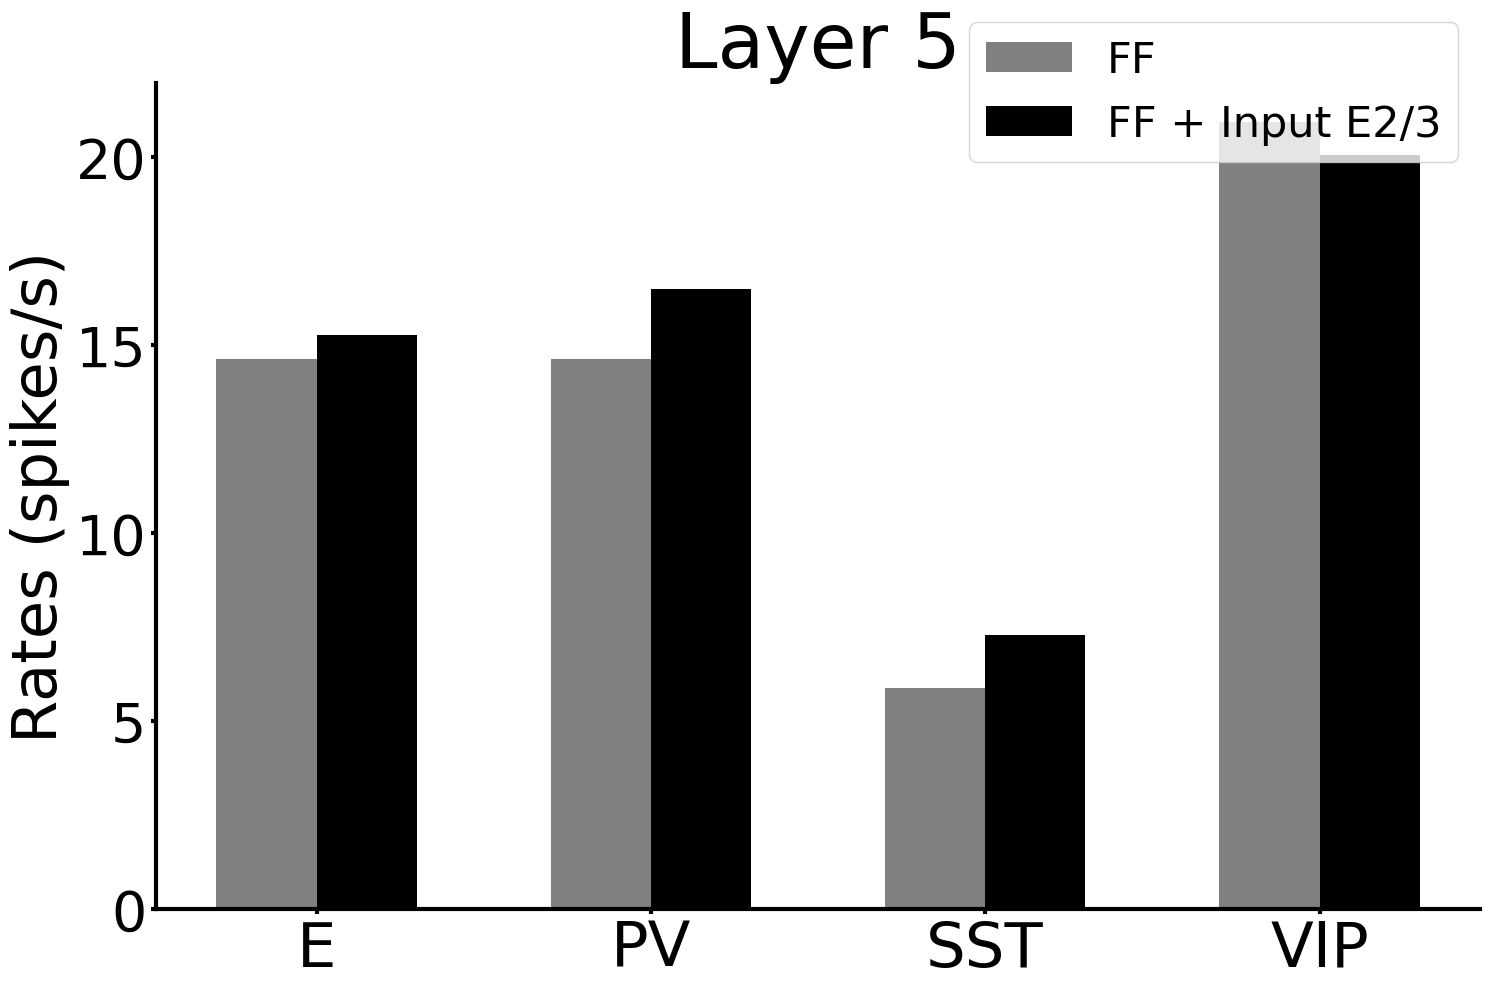

In [318]:
#Fig2: Mean firing rates in the spontanous and in the condition with perturbative input to one population (E2/3).
#Fig2: Mean firing rates in the FF state and in the condition with perturbative input to one population (E2/3).

#Layer 5 only is shown

#Data to plot
model_means5= [rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1]
base_means5= [rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0]


#Labels for the plot
labels = ['E','PV', 'SST', 'VIP']
x = np.arange(len(labels))  # the label locations
w = 0.3  # the width of the bars
width=0.3

#Plot 
f, ax = plt.subplots(figsize=(15,10))
#to plot the Spontanous case
#ax.bar(x - width/2, base_means5, width=w,color='grey', alpha=1, label='Spontaneous')
#ax.bar(x + width/2, model_means5, width=w,color='black', alpha=1, label='Spontaneous + Input E2/3')

#to plot the FF case
ax.bar(x - width/2, base_means5, width=w,color='grey', alpha=1, label='FF')
ax.bar(x + width/2, model_means5, width=w,color='black', alpha=1, label='FF + Input E2/3')


#Layout
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.set_ylabel('Rates (spikes/s)', fontsize=45)
ax.set_title('Layer 5',fontsize=55)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=45)
plt.yticks(fontsize=40)
plt.locator_params(axis='y', nbins=5)

ax.tick_params(top=False,
       bottom=True,
       left=True,
       right=False,
       labelleft=True,
       labelbottom=True)

plt.setp(ax.spines.values(), linewidth=3) #linewidth of the plot
plt.gca().spines['right'].set_color('none') #No box of the plot
plt.gca().spines['top'].set_color('none')

#Legend
#For Spontanous case (Fig 2A): 
#ax.legend(fontsize=31)
#For FF case (Fig 2B): 
ax.legend(loc='upper right',bbox_to_anchor=(1, 1.1), fontsize=31) 

f.tight_layout()

#Save the fig
#plt.savefig('../IMAGES/fig2_bar_spont.png') #(Fig 2A)
#plt.savefig('../IMAGES/fig2_bar_FF.png')     #(Fig 2B)

plt.show()



In [319]:
#From here I create the plots for the perturbation matrix 

#For the spont. case (Fig 2A):
#folder_data='../simulations_data/In_spontaneuous'
#For the FF case (Fig 2B):
#folder_data='../simulations_data/In_with_e4'



#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_0pA_e6_0pA" #spont
#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_150pA_e6_0pA" #input L2/3

#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_0pA_e6_150pA" #input L6


#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_150pA_pert_30pA" #input L5

#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_150pA_e23_150pA_e6_0pA" #input L5, L2/3
#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_150pA_e23_150pA_e6_150pA" #input L5, L2/3, L6

#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_150pA_e5_0pA_pert_30pA" #input to L4
folder_data = "../simulations_data/REVISIONS_1/Sim_e4_150pA_e5_150pA_pert_30pA" #input to L4 & L5 



In [320]:
#I create the matrix that will contain the firing rate of each population in that particular simulation
#The input is given to one different population for every simulation.

Matrix_all=[] #create empty array

for i in ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6']:
    #i1 contains the data of the simualtion with perturbative input to first population (E2/3),
    #i2 (input to PV2/3), etc. 
    #I have 16 simulations: input to one population in each simualtion (16 populations in total)
    
    #Import the data of one simulation 'i'
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_data+'/'+i)
    
    #compute the rates 
    rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
    S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
    S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
    S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)


    #PERCENTAGE CHANGE of the FR of EACH population (I compare to the value before the input)
    dif_e23=(rate_e23_1 - rate_e23_0)/ rate_e23_0
    dif_pv23=(rate_pv23_1 - rate_pv23_0) / rate_pv23_0
    dif_sst23=(rate_sst23_1 - rate_sst23_0) / rate_sst23_0
    dif_vip23= (rate_vip23_1 - rate_vip23_0)/rate_vip23_0
    dif_e4=(rate_e4_1 - rate_e4_0 )/rate_e4_0
    dif_pv4=(rate_pv4_1 - rate_pv4_0) /rate_pv4_0
    dif_sst4=(rate_sst4_1 - rate_sst4_0) /rate_sst4_0
    dif_vip4=(rate_vip4_1 - rate_vip4_0) /rate_vip4_0
    dif_e5=(rate_e5_1 - rate_e5_0) /rate_e5_0
    dif_pv5=(rate_pv5_1 - rate_pv5_0) /rate_pv5_0
    dif_sst5=(rate_sst5_1 - rate_sst5_0) /rate_sst5_0
    dif_vip5=(rate_vip5_1 - rate_vip5_0) /rate_vip5_0
    dif_e6=(rate_e6_1 - rate_e6_0) /rate_e6_0
    dif_pv6=(rate_pv6_1 - rate_pv6_0) /rate_pv6_0
    dif_sst6=(rate_sst6_1 - rate_sst6_0) /rate_sst6_0
    dif_vip6=(rate_vip6_1 - rate_vip6_0) /rate_vip6_0
    
    #I create the first row of the matrix containing all the rates
    dif_row=[dif_e23,dif_pv23,dif_sst23,dif_vip23,
            dif_e4,dif_pv4,dif_sst4,dif_vip4,
             dif_e5,dif_pv5,dif_sst5,dif_vip5,
             dif_e6,dif_pv6,dif_sst6,dif_vip6]
    
    Matrix_all.append(dif_row) #Fill the matrix with the data you computed
    

#Save the matrix in one file
#f=open('../simulations_data/matrix/MATRIX_baseline.txt','w+') #create the file to write the values of the matrix
#f=open('../simulations_data/matrix/MATRIX_inpute4.txt','w+') #create the file to write the values of the matrix


#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_spont.txt','w+') #create the file to write the values of the matrix

#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L23.txt','w+') #create the file to write the values of the matrix
#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L6.txt','w+') #create the file to write the values of the matrix

# f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt','w+') #create the file to write the values of the matrix
#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23.txt','w+') #create the file to write the values of the matrix
#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23_L6.txt','w+') #create the file to write the values of the matrix
#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt','w+') #create the file to write the values of the matrix
f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt','w+') #create the file to write the values of the matrix



for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %Matrix_all[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 3.322917
rate_e23: 4.106526 rate_pv23: 11.569231 rate_sst23: 8.290780 rate_vip23: 24.996885
rate_e4: 16.752475 rate_pv4: 18.282313 rate_sst4: 2.754717 rate_vip4: 12.703704
rate_e5: 15.271705 rate_pv5: 16.476190 rate_sst5: 7.291667 rate_vip5: 20.030303
rate_e6: 2.342571 rate_pv6: 20.843137 rate_sst6: 7.218954 rate_vip6: 8.017544
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 2.986111
rate_e23: 0.112460 rate_pv23: 21.328205 rate_sst23: 5.737589 rate_vip23: 16.962617
rate_e4: 16.488449 rate_pv4: 13.404762 rate_sst4: 1.861635 rate_vip4: 7.049383
rate_e5: 14.553306 rate_pv5: 12.962963 rate_sst5: 5.910714 rate_vip5: 21.303030
rate_e6: 2.528108 rate_pv6: 20.552288 rate_sst6: 7.339869 rate_vip6: 7.929825
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 2.829861
rate_e23: 0.14

In [466]:
#I import the matrix I just created

#m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_spont.txt')   #For spontaneous

#m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L23.txt')   #L23
#m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L6.txt')   #L6

# m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt')   #L5
m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23.txt') #L5 & L23
#m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23_L6.txt')   #L5 & L23 & L6

#m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt')   #L4
#m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt')  #L4 & L5





In [467]:
#THis is to find the values for the color map
matrix=m_import
# Step 1: Identify positive values
positive_values = matrix[matrix > 0]

# Step 2: Sort the positive values
sorted_positive_values = np.sort(positive_values)
print(sorted_positive_values)
# Step 3: Select values at regular intervals
interval = int(len(sorted_positive_values)/5) # Example interval, you can choose the desired interval
selected_values = sorted_positive_values[interval::interval]
print(selected_values)

selected_values_new=(selected_values/(2*np.max(matrix)))+0.5
print(selected_values_new)



negative_values = matrix[matrix < 0]

# Step 2: Sort the positive values
sorted_negative_values = np.sort(negative_values)
print(sorted_negative_values)
# Step 3: Select values at regular intervals
interval_neg = int(len(sorted_negative_values)/4) # Example interval, you can choose the desired interval
selected_values_neg = sorted_negative_values[::interval_neg]
print(selected_values_neg)

selected_values_neg_new=0.5+(selected_values_neg/(2*np.max(matrix)))
print(selected_values_neg_new)

[1.0000000e-03 1.2590000e-03 1.5210000e-03 1.5590000e-03 2.6390000e-03
 3.7630000e-03 4.0550000e-03 4.5490000e-03 4.9020000e-03 5.4000000e-03
 5.5120000e-03 5.6890000e-03 6.4790000e-03 6.6870000e-03 7.5260000e-03
 7.7140000e-03 7.8770000e-03 8.3570000e-03 9.8040000e-03 1.2898000e-02
 1.4004000e-02 1.4629000e-02 1.4706000e-02 1.6793000e-02 1.7632000e-02
 1.7819000e-02 1.8200000e-02 1.8892000e-02 2.4560000e-02 2.5921000e-02
 2.6183000e-02 3.0641000e-02 3.3426000e-02 3.6392000e-02 3.9006000e-02
 5.0529000e-02 5.5935000e-02 6.0832000e-02 6.5774000e-02 9.0123000e-02
 1.1142100e-01 1.3116600e-01 1.5361100e-01 1.6176500e-01 1.8105800e-01
 2.1274300e-01 2.1860000e-01 2.2149000e-01 2.5626700e-01 2.6225500e-01
 2.7927000e-01 2.8395100e-01 2.9628200e-01 3.1167100e-01 3.6939300e-01
 3.9563400e-01 4.1666700e-01 4.1729900e-01 4.3689800e-01 4.5100000e-01
 4.5751100e-01 4.6019100e-01 4.6438000e-01 5.0020000e-01 5.0324000e-01
 5.4984200e-01 5.9549100e-01 5.9753100e-01 6.0318700e-01 6.3067000e-01
 6.313

In [468]:
# for i in range(0,16):
#     m_import[i][i]=0

#m_import[0][7]=0
#m_import[8][7]=0

#np.fill_diagonal(m_import, np.nan)

#m_import_1 = np.sign(m_import) * np.log(np.abs(m_import)) 
# for i in range(0,16):
#     for j in range(0,16):
#         print(m_import[i][j])
#         #m_import[i][j]= np.sign(m_import[i][j]) * np.log10(np.abs(m_import[i][j])) 
#         m_import[i][j]=np.sign(m_import[i][j])*np.sqrt(np.abs(m_import[i][j]))
#         print(m_import[i][j])



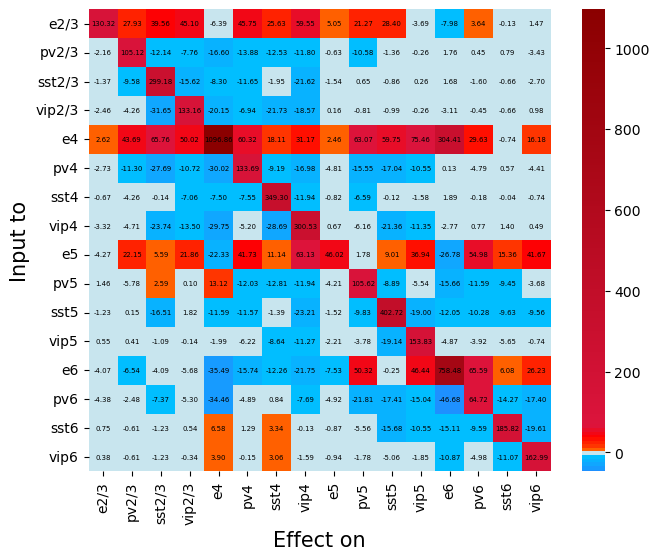

In [469]:
#Plot of the matrix
#Percentage change of the firing rate of each population as effect of the perturbation input to one population ("source population").
from matplotlib.colors import LinearSegmentedColormap

#create the figure
fig = plt.figure(figsize=(8, 6)) 
#labels
x_axis_labels = ['e2/3','pv2/3','sst2/3','vip2/3','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
y_axis_labels = ['e2/3','pv2/3','sst2/3','vip2/3','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis

# colors = [(0, 'blue'),
#           (selected_values_neg_new[0], 'blue'),
#           (selected_values_neg_new[1], 'deepskyblue'),
#           (selected_values_neg_new[2], 'lightblue'),
#           (0.5, 'white'), 
#           (selected_values_new[0], 'yellow'),
#           (selected_values_new[1], 'orange'),
#           (selected_values_new[2], 'red'),
#           (selected_values_new[3], 'darkred'), 
#           (1, 'black')]

colors = [(0, 'darkblue'),
          (selected_values_neg_new[0], 'dodgerblue'),
          (selected_values_neg_new[1], 'deepskyblue'),
          (selected_values_neg_new[2], 'lightblue'),
          (0.5, 'white'), 
          (selected_values_new[0], 'orange'),
          (selected_values_new[1], 'orangered'),
          (selected_values_new[2], 'red'),
          (selected_values_new[3], 'crimson'), 
          (1, 'darkred')]

# Create a colormap that maps the given colors to values between 0 and 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

norm = plt.Normalize(vmin=np.min(m_import)*100, vmax=np.max(m_import)*100)


mA_plot = sns.heatmap(np.array(m_import)*100,annot=True,norm=norm,center=0,square=True,cmap=custom_cmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels,mask=np.isnan(m_import),fmt=".2f", annot_kws={"size": 5, "color": "black"}) # plot with heatmap
mA_plot.set_xlabel('Effect on', fontsize=15)
mA_plot.set_ylabel('Input to', fontsize=15)
#plt.title('Matrix baseline',fontsize=18)
#plt.title('Matrix FF',fontsize=18)

#Show the plot
plt.show(mA_plot)

In [470]:
# Store the original diagonal values
original_diagonal_values = np.diag(m_import).copy()

print(original_diagonal_values)
# Set the diagonal elements to NaN to exclude them from the colormap
np.fill_diagonal(m_import, np.nan)


[ 1.303175  1.051191  2.991814  1.3316   10.968642  1.336874  3.493036
  3.005305  0.460191  1.056156  4.02716   1.538259  7.584803  0.647152
  1.858206  1.629902]


In [471]:
print(original_diagonal_values)

[ 1.303175  1.051191  2.991814  1.3316   10.968642  1.336874  3.493036
  3.005305  0.460191  1.056156  4.02716   1.538259  7.584803  0.647152
  1.858206  1.629902]


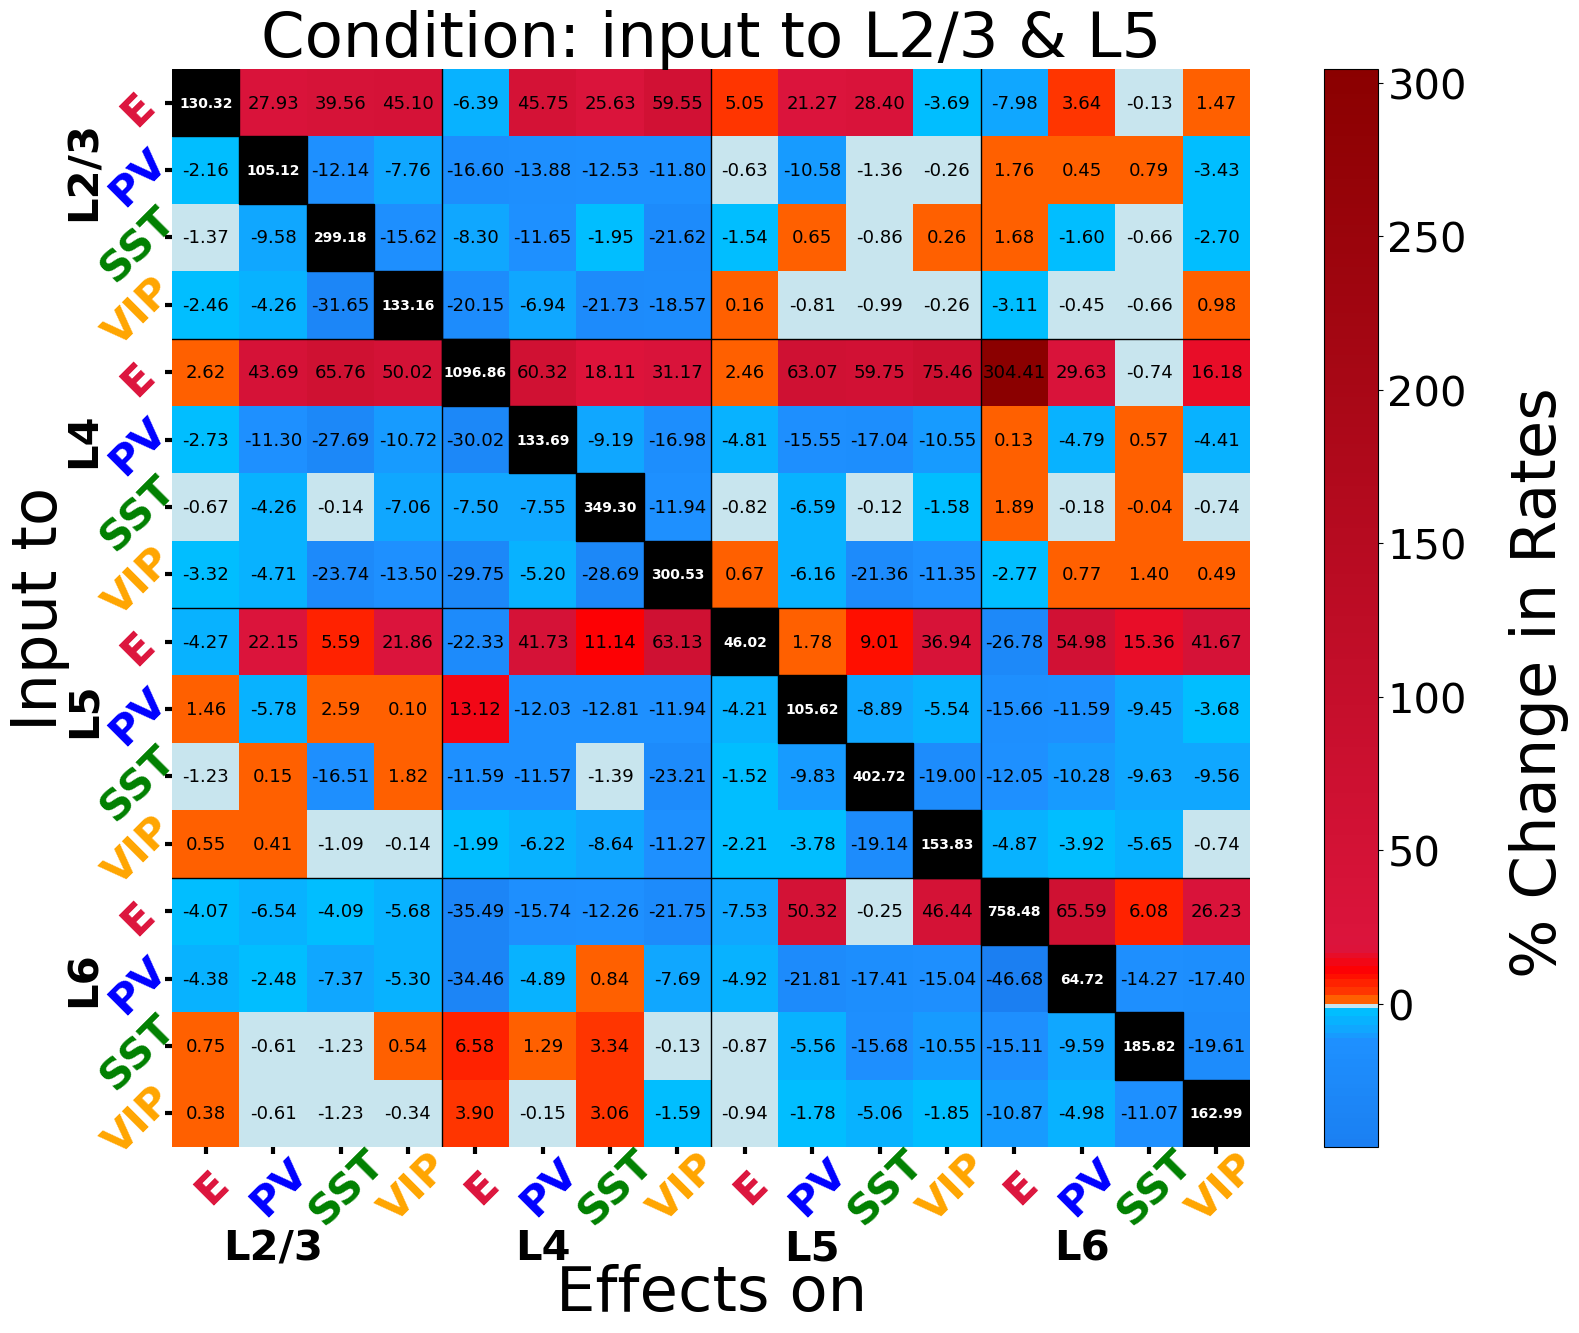

In [482]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure


#norm = plt.Normalize(vmin=np.min(m_import)*100, vmax=np.max(m_import)*100)
norm = plt.Normalize(vmin=np.nanmin(m_import)*100, vmax=np.nanmax(m_import)*100)

#cmap='PRGn'
#Plot
mA_plot = sns.heatmap(np.array(m_import)*100,annot=True,cmap=custom_cmap,norm=norm,center=0,square=True,cbar=False, linewidths=0.,fmt=".2f", annot_kws={"size": 13, "color": "black"}) # plot GH with heatmap


# Add black diagonal with original values as white text
for i in range(len(original_diagonal_values)):
    mA_plot.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='black'))
    mA_plot.text(i+0.5, i+0.5, f'{original_diagonal_values[i]*100:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, m_import.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(4,105 ,'% Change in Rates', rotation=90, va='center', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=30)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Spontaneous condition',fontsize=45) #Fig 2A
#plt.title('Feedforward condition',fontsize=45)  #Fig 2B

#plt.title('Spontaneous condition',fontsize=45) #Fig 2A
#plt.title('Condition: input to L2/3',fontsize=45) #Fig 2A
#plt.title('Condition: input to L6',fontsize=45) #Fig 2A

# plt.title('Condition: input to L5',fontsize=45) #Fig 2A
plt.title('Condition: input to L2/3 & L5',fontsize=45) #Fig 2A
#plt.title('Condition: input to L2/3, L5 & L6',fontsize=45) #Fig 2A
#plt.title('Condition: input to L4',fontsize=45) #Fig 2A
#plt.title('Condition: input to L4 & L5',fontsize=45) #Fig 2A

#Save the image
#Fig 2A:
#plt.savefig('../IMAGES/fig2_matrix_spont_colorsBlackblue.png', bbox_inches='tight')
#Fig 2B:
#plt.savefig('../IMAGES/fig2_matrix_FF_colorsBlackblue.png', bbox_inches='tight')


#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_spont.png', bbox_inches='tight')


#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L23.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L6.png', bbox_inches='tight')

# plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5.png', bbox_inches='tight')
plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_L23.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_L23_L6.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L4.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L4_L5.png', bbox_inches='tight')




plt.show(mA_plot)

In [405]:
#To better visualize the changes in firing rates we are creating a new matrix 

#I WANT A MATRIX with only 3 values:
# 1 if the fr is increased (by more than 20%)
# -1 if the fr is decreased (by more than 20%)
# 0 if is the same (less/more by less than 20%)

sign_matrix= [[1 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 

threshold=0.2

for h in range(0,16):
    for k in range(0,16):
        if m_import[h][k]>0 and m_import[h][k]>threshold :
            sign_matrix[h][k]=1
        elif abs(m_import[h][k])<threshold :
            sign_matrix[h][k]=0
        elif m_import[h][k]<0 and abs(m_import[h][k])>threshold :
            sign_matrix[h][k]=-1
#print(sign_matrix)

In [329]:
#Save the matrix in one file
#f=open('../simulations_data/REVISIONS_1/matrix/sign_baseline_20%.txt','w+') #Spontaneous

#f=open('../simulations_data/REVISIONS_1/matrix/sign_L23_20%.txt','w+') #L23
#f=open('../simulations_data/REVISIONS_1/matrix/sign_L6_20%.txt','w+') #L6
# f=open('../simulations_data/REVISIONS_1/matrix/sign_L5_20%.txt','w+') #L5
#f=open('../simulations_data/REVISIONS_1/matrix/sign_L5_L23_20%.txt','w+') #L2/3 L5
#f=open('../simulations_data/REVISIONS_1/matrix/sign_L5_L23_L6_20%.txt','w+') #L2/3 L5 L6
#f=open('../simulations_data/REVISIONS_1/matrix/sign_L4_20%.txt','w+') #Spontaneous
f=open('../simulations_data/REVISIONS_1/matrix/sign_L4_L5_20%.txt','w+') #L4 & L5




for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %sign_matrix[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

In [384]:
#I import the matrix I just created
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_baseline_20%.txt') #Spontaneous

#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L23_20%.txt') #L23
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L6_20%.txt') #L6

#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L5_20%.txt') #Spontaneous
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L5_L23_20%.txt') # L2/3 L5
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L5_L23_L6_20%.txt') # L2/3 L5 L6

#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_20%.txt') #Spontaneous
sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_L5_20%.txt') #L4 & L5


In [385]:
#Fig. 2A and 2B, perturbation matrix 

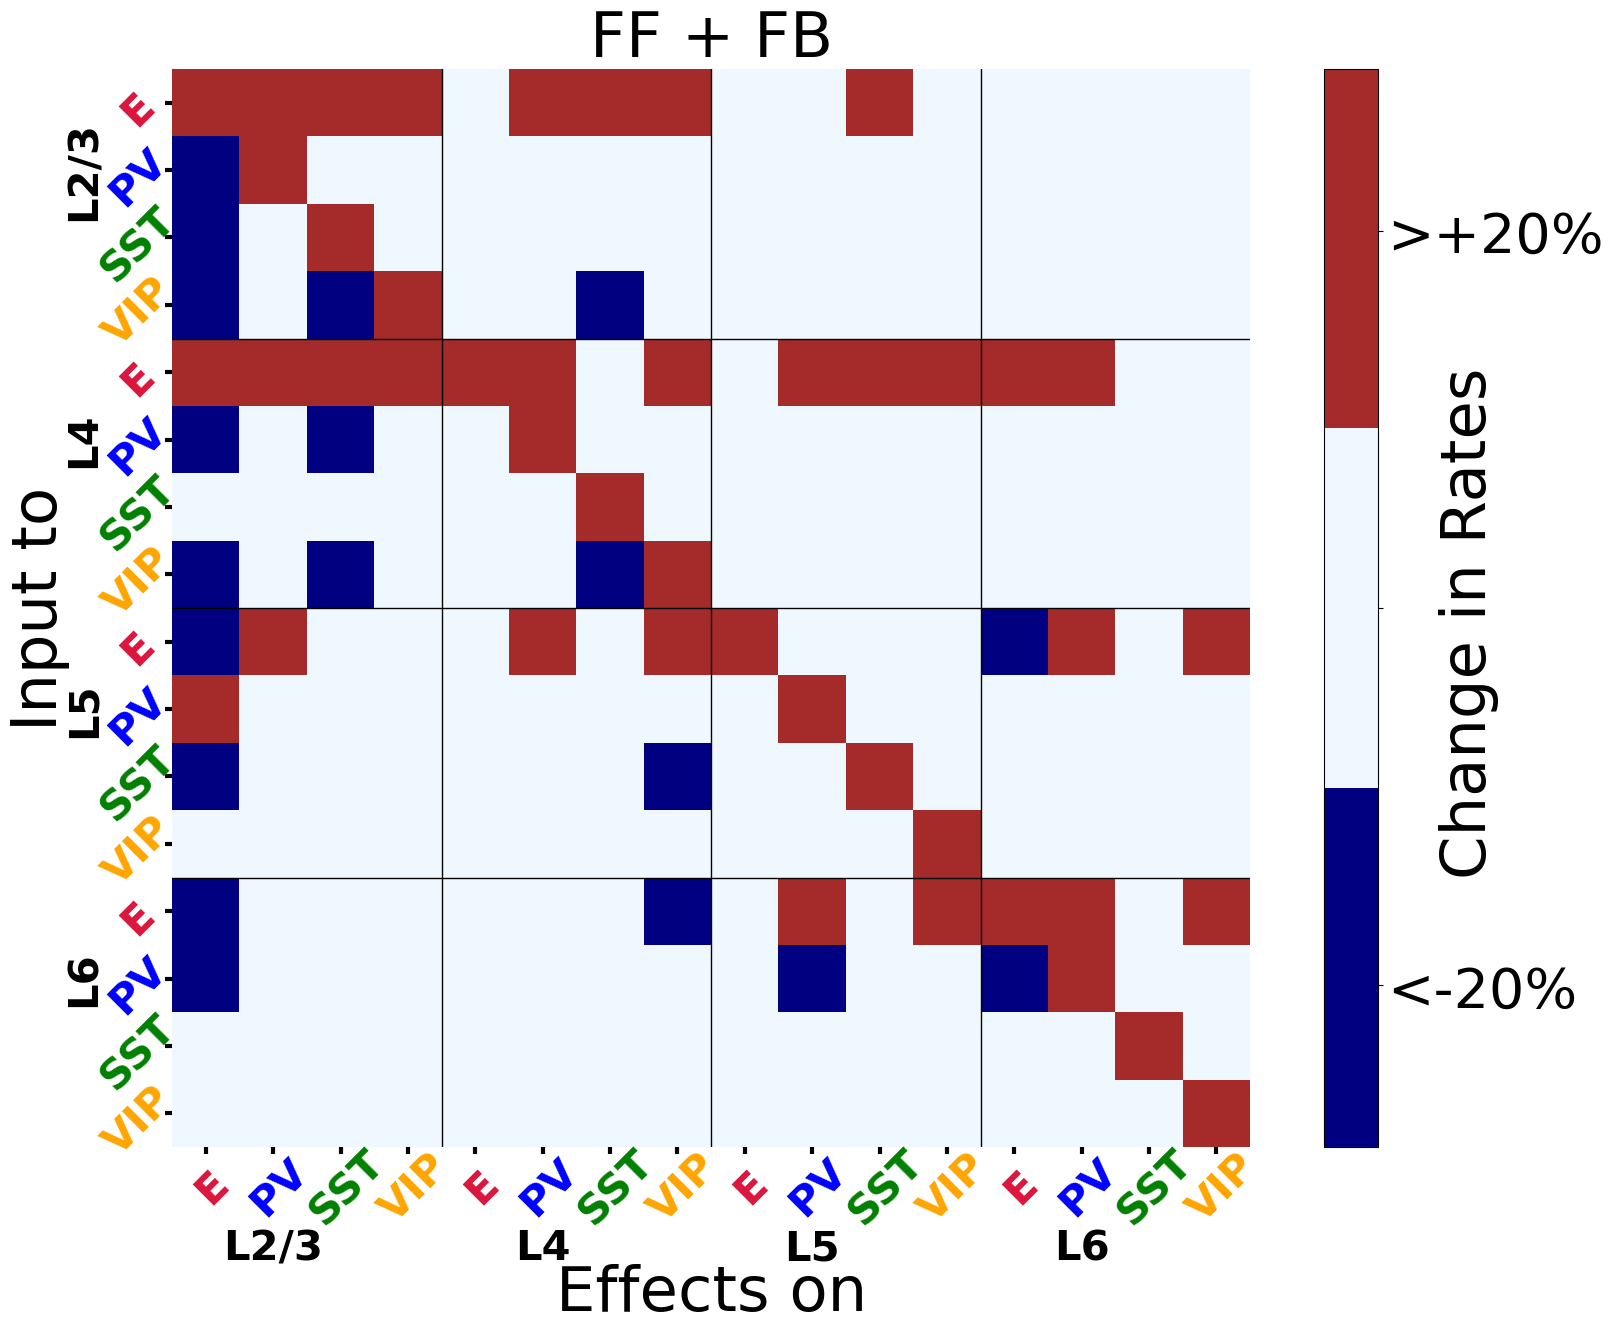

In [387]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure



colors = ["navy", "aliceblue",'brown' ]#colors I want 
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix),square=True,cmap=col_map,cbar=False, linewidths=0.) # plot GH with heatmap

mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

#Set bar layout
colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['<-20%', '', '>+20%'])
# colorbar.set_ticklabels(['>-10%', '0', '>10%'])
# colorbar.set_ticklabels(['>-30%', '0', '>30%'])
# colorbar.set_ticklabels(['>-50%', '0', '>50%'])

cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(2.7, -0.5, 'Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=40)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Spontaneous condition',fontsize=45) #Fig 2A
#plt.title('Condition: input to L2/3',fontsize=45) #Fig 2A
#plt.title('Condition: input to L6',fontsize=45) #Fig 2A

# plt.title('Condition: input to L5',fontsize=45) #Fig 2A
#plt.title('Condition: input to L5 & L2/3',fontsize=45) #Fig 2A
#plt.title('Condition: input to L5 & L2/3 & L6',fontsize=45) #Fig 2A
#plt.title('Condition: input to L4',fontsize=45) #Fig 2A
#plt.title('Condition: input to L4 & L5',fontsize=45) #Fig 2A

plt.title('FF + FB',fontsize=45) #Fig 2A




#Save the image
#Fig 2A:
#plt.savefig('../IMAGES/REVISIONS_1/fig2_matrix_spont.png', bbox_inches='tight')
#Fig 2B:
#plt.savefig('../IMAGES/fig2_matrix_FF.png', bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_spont_20%.png', bbox_inches='tight')


#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L23_20%.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L6_20%.png', bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_20%.png', bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_L23_20%.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_L23_L6_20%.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L4_20%.png', bbox_inches='tight')
plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L4_L5_20%.png', bbox_inches='tight')



plt.show(mA_plot)

In [334]:
#Fig. 2C
#Comparison between two matrices

In [348]:
#Compare FF+FB vs spontaneous (Fig. 5D)
# sign_baseline=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_baseline_20%.txt')
# sign_input=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_L5_20%.txt')


#Compare FF+FB vs FF (Fig. 5E)
# sign_baseline=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_20%.txt')
# sign_input=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_L5_20%.txt')


#Compare FF+FB vs FB (Fig. 5F)
sign_baseline=np.loadtxt('../simulations_data/REVISIONS_1/matrix/0.2_sign_Sim_e4_0pA_e5_150pA_pert_30pA.txt')
sign_input=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_L5_20%.txt')


#Compare FF vs spontaneous (Fig. 2C)
# sign_baseline=np.loadtxt('../simulations_data/matrix/0.2_sign_In_spontaneuous.txt')
# sign_input=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4.txt')

#Compare FB vs spontaneous (Fig. 3B)
# sign_baseline=np.loadtxt('../simulations_data/matrix/0.2_sign_In_spontaneuous.txt')
# sign_input=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e5.txt')



In [349]:
sign_matrix_diff= [[0 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 
#0 means no change (between the two matrices)
#1 means change increase: from -1 to 0, 0 to 1, -1 to 1
#- 1 means change decrease: from 1 to 0, from 0 to -1
for h in range(0,16):
    for k in range(0,16):
        if sign_baseline[h][k]== sign_input[h][k]:
            sign_matrix_diff[h][k]=0  
    
        if sign_baseline[h][k]== 1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==0 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1    

        if sign_baseline[h][k]== -1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=1
        if sign_baseline[h][k]==0 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1
            

        if sign_baseline[h][k]==1 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==-1 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1

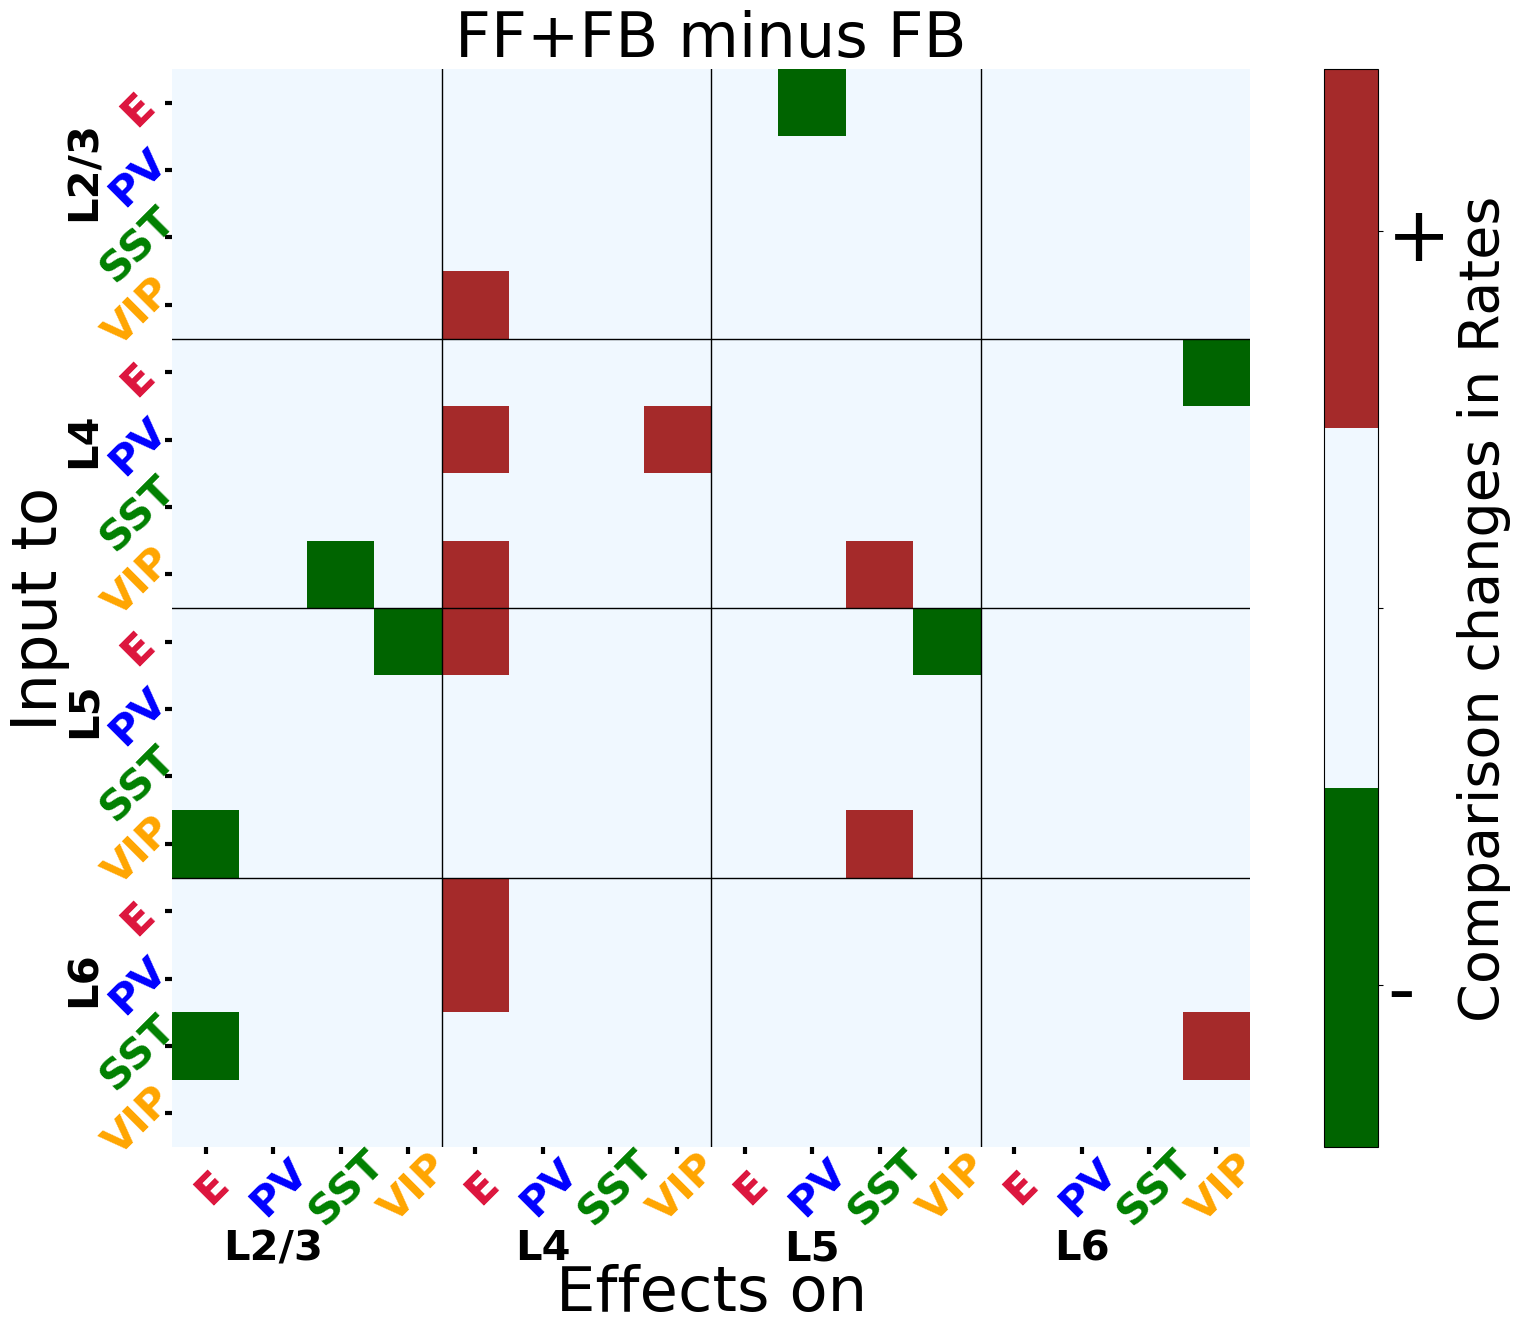

In [350]:
#Create the matrix plot 
fig = plt.figure(figsize=(19, 14)) #create the figure

colors = ["darkgreen", "aliceblue",'brown' ] #colors

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix_diff),square=True,cmap=col_map,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=0.) # plot GH with heatmap

#Layout matrix
mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

    
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

#Set bar layout
colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['-', '', '+'])
colorbar.set_label("Comparison changes in Rates",size=40)
cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=55)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Feedforward minus Spontaneous',fontsize=45)
#plt.title('FF+FB minus Spontaneous',fontsize=45)        #Fig. 5D
#plt.title('FF+FB minus FF',fontsize=45)                #Fig. 5E
plt.title('FF+FB minus FB',fontsize=45)                #Fig. 5F
#plt.title('Feedforward minus Spontaneous',fontsize=45) #Fig. 2C
#plt.title('Feedback minus Spontaneous',fontsize=45)    #Fig. 3B


#Save fig:  
#plt.savefig('../IMAGES/REVISIONS_1/fig5_matrix_FB&FF_DIFFvsSpont.png', bbox_inches='tight')    #Fig. 5D
#plt.savefig('../IMAGES/REVISIONS_1/fig5_matrix_FB&FF_DIFFvsFF.png', bbox_inches='tight')       #Fig. 5E
plt.savefig('../IMAGES/REVISIONS_1/fig5_matrix_FB&FF_DIFFvsFB.png', bbox_inches='tight')       #Fig. 5F

#plt.savefig('../IMAGES/REVISIONS_1/fig2_matrix_FF_DIFFvsSpont.png', bbox_inches='tight')       #Fig. 2C
#plt.savefig('../IMAGES/REVISIONS_1/fig3_matrix_FB_DIFFvsSpont.png', bbox_inches='tight')       #Fig. 3B

plt.show(mA_plot)

In [450]:
#Compare FF+FB vs spontaneous (Fig. 5D)
m_import_base=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt') #L4 & L5
m_import_ff=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_SPONT.txt')   #For spont



#Compare FF+FB vs FF (Fig. 5E)
# m_import_base=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt') #L4 & L5
# m_import_ff=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt')   #For FF



#Compare FF+FB vs FB (Fig. 5F)
# m_import_base=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt') #L4 & L5
# m_import_ff=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt')   #For FB



In [451]:
#m_import_base=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_spont.txt') #For spontaneous
#m_import_ff=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt')   #For FF

m_diff = m_import_ff - m_import_base

In [452]:
#THis is to find the values for the color map
matrix=m_diff
# Step 1: Identify positive values
positive_values = matrix[matrix > 0]

# Step 2: Sort the positive values
sorted_positive_values = np.sort(positive_values)
print(sorted_positive_values)
# Step 3: Select values at regular intervals
interval = int(len(sorted_positive_values)/5) # Example interval, you can choose the desired interval
selected_values = sorted_positive_values[interval::interval]
print(selected_values)

selected_values_new=(selected_values/(2*np.max(matrix)))+0.5
print(selected_values_new)



negative_values = matrix[matrix < 0]

# Step 2: Sort the positive values
sorted_negative_values = np.sort(negative_values)
print(sorted_negative_values)
# Step 3: Select values at regular intervals
interval_neg = int(len(sorted_negative_values)/5) # Example interval, you can choose the desired interval
selected_values_neg = sorted_negative_values[::interval_neg]
print(selected_values_neg)

selected_values_neg_new=0.5+(selected_values_neg/(2*np.abs(np.min(matrix))))
print(selected_values_neg_new)

[3.0930000e-03 3.7980000e-03 4.2860000e-03 5.4190000e-03 5.5640000e-03
 5.9080000e-03 7.5120000e-03 7.5290000e-03 8.7910000e-03 8.8570000e-03
 1.0625000e-02 1.2226000e-02 1.3002000e-02 1.6144000e-02 2.0839000e-02
 2.4230000e-02 2.4377000e-02 2.6661000e-02 2.8130000e-02 3.0163000e-02
 3.0812000e-02 3.1626000e-02 4.0980000e-02 4.2029000e-02 4.2809000e-02
 4.7411000e-02 5.1898000e-02 7.5322000e-02 8.0204000e-02 1.2847600e-01
 1.4571000e-01 1.5846300e-01 1.9137100e-01 1.9656300e-01 2.0840800e-01
 2.0846500e-01 2.1569600e-01 2.2378600e-01 2.9067800e-01 3.1150300e-01
 3.2584400e-01 3.2950300e-01 3.4399800e-01 4.3434100e-01 4.8989100e-01
 6.0566200e-01 6.1299800e-01 6.1313900e-01 6.3786200e-01 7.1484500e-01
 7.6388100e-01 7.7793700e-01 8.0927900e-01 8.2526400e-01 8.3221900e-01
 9.7255100e-01 1.0321270e+00 1.0375810e+00 1.0387460e+00 1.0524370e+00
 1.1004520e+00 1.1556450e+00 1.2159750e+00 1.2175270e+00 1.2231480e+00
 1.2666650e+00 1.3241820e+00 1.4554920e+00 1.4953830e+00 1.6089210e+00
 1.609

In [453]:
# Store the original diagonal values
original_diagonal_values = np.diag(m_diff).copy()

print(original_diagonal_values)
# Set the diagonal elements to NaN to exclude them from the colormap
np.fill_diagonal(m_diff, np.nan)



[ 5.573144  1.215975  2.185243  1.052437 11.702954  1.495383  1.032127
 19.585844  3.224576  1.324182  1.650431  1.609495  3.748263  1.037581
  0.434341  1.672283]


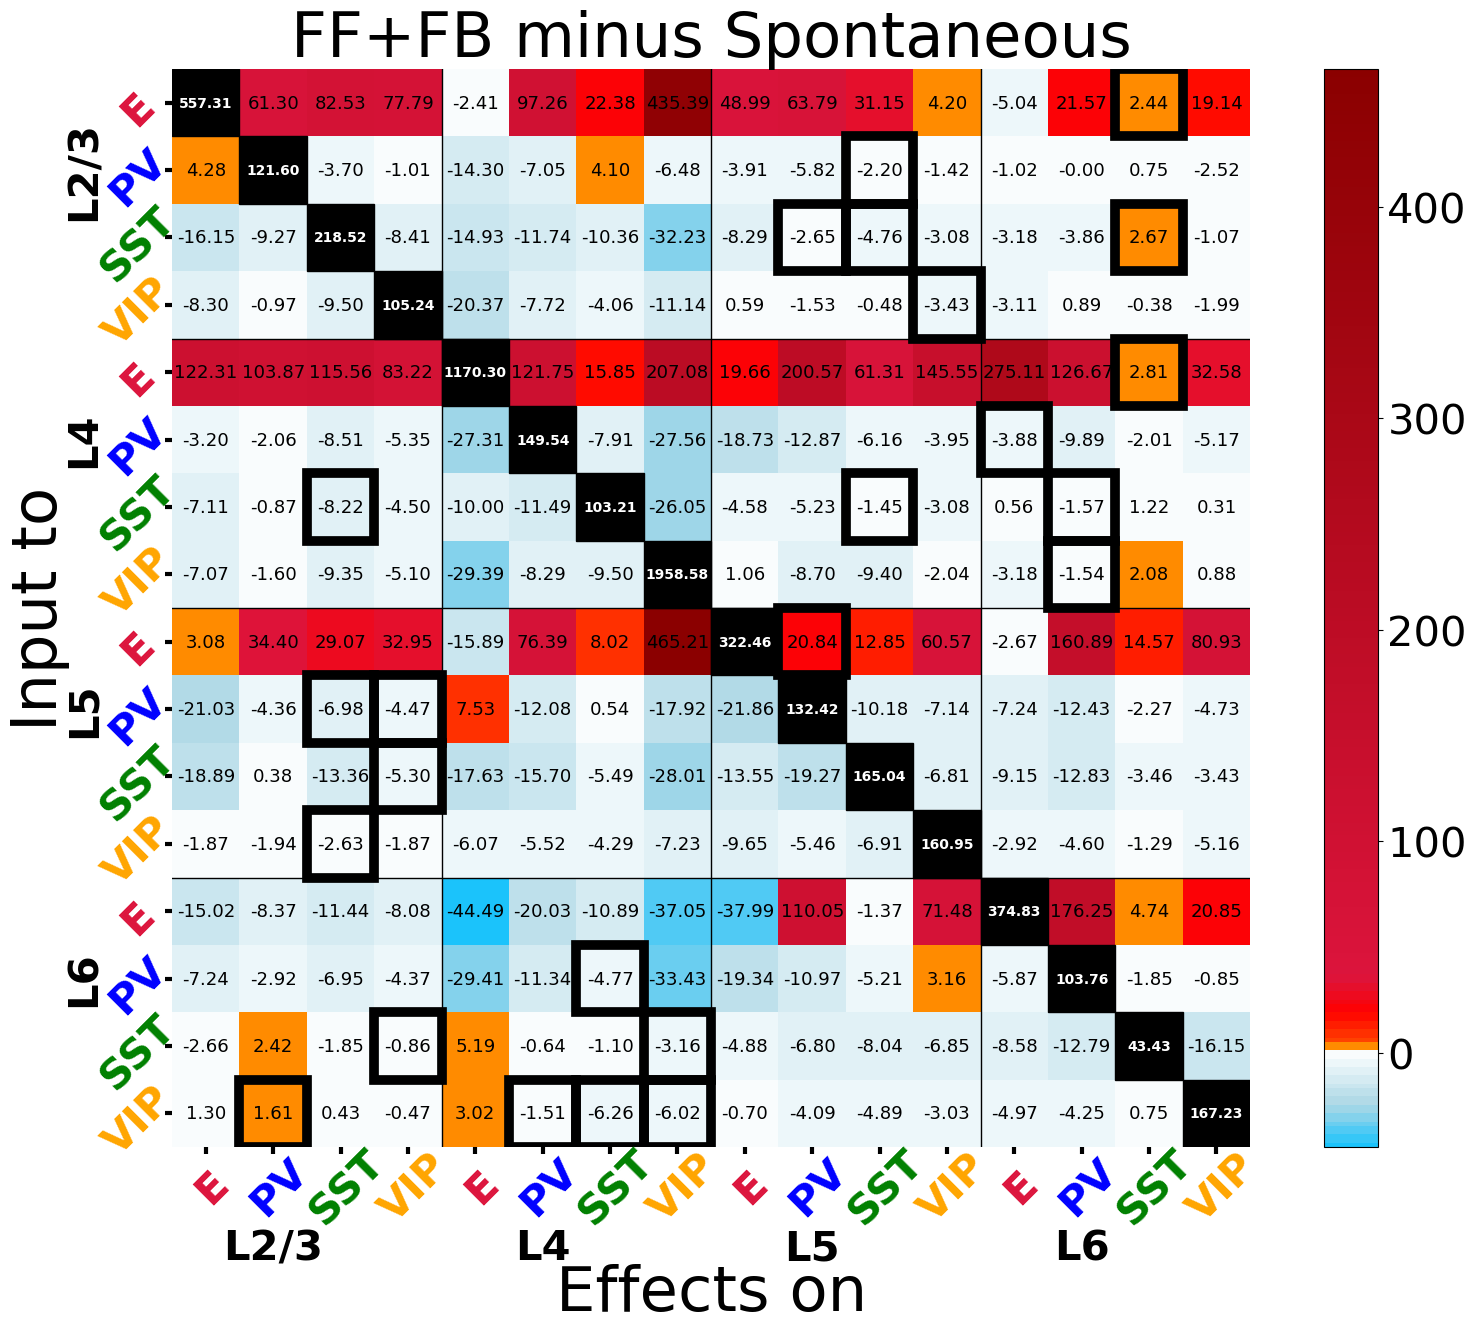

In [454]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure

colors = [(0, 'blue'),
          (selected_values_neg_new[1], 'steelblue'),
          (selected_values_neg_new[2], 'dodgerblue'),
          (selected_values_neg_new[3], 'deepskyblue'),
          (selected_values_neg_new[4], 'lightblue'),
          (0.5, 'white'),
          (selected_values_new[0], 'orange'),
          (selected_values_new[1], 'orangered'),
          (selected_values_new[2], 'red'),
          (selected_values_new[3], 'crimson'), 
          (1, 'darkred')]




# colors = [(0, 'darkblue'),
#           (selected_values_neg_new[1], 'blue'),
#           (selected_values_neg_new[2], 'steelblue'),
#           (selected_values_neg_new[3], 'deepskyblue'),
#           (selected_values_neg_new[4], 'lightblue'),
#           (0.5, 'white'),
#           (selected_values_new[0], 'orange'),
#           (selected_values_new[1], 'orangered'),
#           (selected_values_new[2], 'red'),
#           (selected_values_new[3], 'crimson'), 
#           (1, 'darkred')]

matrix1=m_import_ff  
matrix2=m_import_base

highlight_mask = ((matrix1 > 0) & (matrix2 < 0)) | ((matrix1 < 0) & (matrix2 > 0))


# Create a colormap that maps the given colors to values between 0 and 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

norm = plt.Normalize(vmin=np.nanmin(m_diff)*100, vmax=np.nanmax(m_diff)*100)


#norm = plt.Normalize(vmin=np.min(m_diff)*100, vmax=np.max(m_diff)*100)
#cmap='PRGn'
#cmap=custom_cmap
#Plot
mA_plot = sns.heatmap(np.array(m_diff)*100,annot=True,cmap=custom_cmap,norm=norm,center=0,square=True,cbar=False, linewidths=0.,fmt=".2f", annot_kws={"size": 13, "color": "black"}) # plot GH with heatmap

mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4


# Add black diagonal with original values as white text
for i in range(len(original_diagonal_values)):
    mA_plot.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='black'))
    mA_plot.text(i+0.5, i+0.5, f'{original_diagonal_values[i]*100:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')



# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, m_diff.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
#cbar.ax.text(4, -910,'% Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=30)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Feedforward minus Spontaneous',fontsize=45)
plt.title('FF+FB minus Spontaneous',fontsize=45)
#plt.title('FF+FB minus FF',fontsize=45)
#plt.title('FF+FB minus FB',fontsize=45)



for i in range(highlight_mask.shape[0]):
    for j in range(highlight_mask.shape[1]):
        if highlight_mask[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=7))


#Save the image
#plt.savefig('../IMAGES/fig2_matrix_diff_colors.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig2_matrix_diff_colors_Blackblue.png', bbox_inches='tight')

plt.savefig('../IMAGES/REVISIONS_1/SUPPfig5_matrix_diff_ff&fb_spont.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/SUPPfig5_matrix_diff_ff&fb_ff.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/SUPPfig5_matrix_diff_ff&fb_fb.png', bbox_inches='tight')



plt.show(mA_plot)

In [449]:
#DISTANCE MATRIX 

In [351]:
spont=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_spont.txt')   #For spontaneous

l4=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt')   #L4
l5=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt')   #L5

l_23=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L23.txt')   #L23
l6=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L6.txt')   #L6

l5_l23=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23.txt') #L5 & L23
l5_l23_l6=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23_L6.txt')   #L5 & L23 & L6

l4_l5=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt')  #L4 & L5




In [353]:
# Compute the difference matrix
difference_matrix = A - B

# Compute the Frobenius norm of the difference matrix
frobenius_norm = np.linalg.norm(difference_matrix, 'fro')

print(f"The Frobenius norm of the difference between matrices A and B is: {frobenius_norm}")

<class 'numpy.ndarray'>


In [355]:
import itertools
# List of all matrices and their names for easier reference
matrices = [spont, l4, l5, l_23, l6, l5_l23, l5_l23_l6, l4_l5]
matrix_names = ['spont', 'L4', 'L5', 'L23', 'L6', 'L5_L23', 'L5_L23_L6', 'L4_L5']

# Initialize a dictionary to store the results
frobenius_results = {}

# Iterate over all pairs of matrices
for (name1, matrix1), (name2, matrix2) in itertools.combinations(zip(matrix_names, matrices), 2):
    # Compute the Frobenius norm of the difference
    diff_norm = np.linalg.norm(matrix1 - matrix2, 'fro')
    frobenius_results[(name1, name2)] = diff_norm

# Display the results
for (name1, name2), norm in frobenius_results.items():
    print(f"Frobenius norm between {name1} and {name2}: {norm:.4f}")

Frobenius norm between spont and L4: 21.7092
Frobenius norm between spont and L5: 22.1057
Frobenius norm between spont and L23: 25.3032
Frobenius norm between spont and L6: 32.1932
Frobenius norm between spont and L5_L23: 31.2413
Frobenius norm between spont and L5_L23_L6: 31.6208
Frobenius norm between spont and L4_L5: 26.0762
Frobenius norm between L4 and L5: 23.5537
Frobenius norm between L4 and L23: 16.6657
Frobenius norm between L4 and L6: 49.8781
Frobenius norm between L4 and L5_L23: 18.6472
Frobenius norm between L4 and L5_L23_L6: 19.0254
Frobenius norm between L4 and L4_L5: 10.3859
Frobenius norm between L5 and L23: 30.4497
Frobenius norm between L5 and L6: 41.4384
Frobenius norm between L5 and L5_L23: 29.4486
Frobenius norm between L5 and L5_L23_L6: 30.3944
Frobenius norm between L5 and L4_L5: 17.9691
Frobenius norm between L23 and L6: 56.7140
Frobenius norm between L23 and L5_L23: 9.9480
Frobenius norm between L23 and L5_L23_L6: 11.7130
Frobenius norm between L23 and L4_L5: 2

Frobenius Norm Matrix:
[[ 0.         21.70916709 22.10571033 25.30316333 32.19318968 31.24131977
  31.62077969 26.07616847]
 [21.70916709  0.         23.55369484 16.66573822 49.87807243 18.64719921
  19.02543801 10.3859018 ]
 [22.10571033 23.55369484  0.         30.44974492 41.43840378 29.44856815
  30.39439005 17.96906391]
 [25.30316333 16.66573822 30.44974492  0.         56.7139891   9.94802217
  11.71298149 22.48637463]
 [32.19318968 49.87807243 41.43840378 56.7139891   0.         61.69562727
  60.84383142 51.53769468]
 [31.24131977 18.64719921 29.44856815  9.94802217 61.69562727  0.
   7.44776413 20.17252721]
 [31.62077969 19.02543801 30.39439005 11.71298149 60.84383142  7.44776413
   0.         20.92987855]
 [26.07616847 10.3859018  17.96906391 22.48637463 51.53769468 20.17252721
  20.92987855  0.        ]]


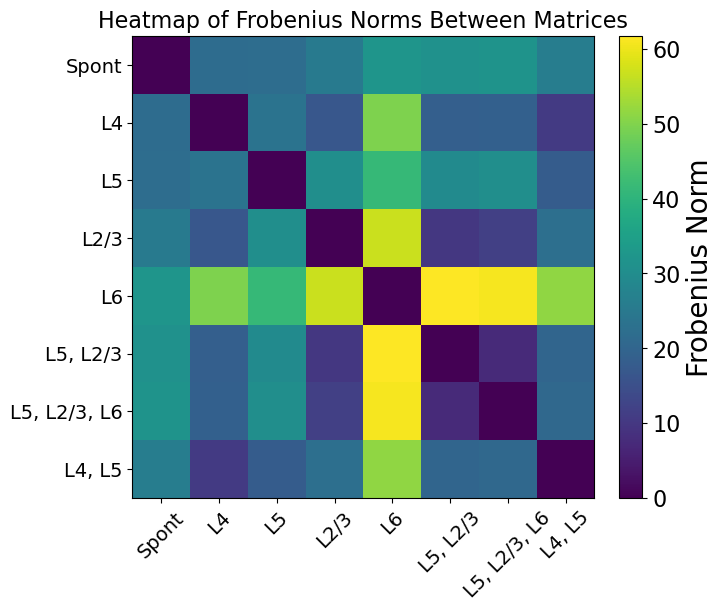

In [383]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Load all the matrices
spont = np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_spont.txt')  # For spontaneous
l4 = np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt')        # L4
l5 = np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt')        # L5
l_23 = np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L23.txt')     # L23
l6 = np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L6.txt')        # L6
l5_l23 = np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23.txt')# L5 & L23
l5_l23_l6 = np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23_L6.txt') # L5 & L23 & L6
l4_l5 = np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt')  # L4 & L5

# List of all matrices and their names for easier reference
matrices = [spont, l4, l5, l_23, l6, l5_l23, l5_l23_l6, l4_l5]
matrix_names = ['Spont', 'L4', 'L5', 'L2/3', 'L6', 'L5, L2/3', 'L5, L2/3, L6', 'L4, L5']

# Initialize an empty matrix to store Frobenius norms
num_matrices = len(matrices)
frobenius_matrix = np.zeros((num_matrices, num_matrices))

# Iterate over all pairs of matrices and compute Frobenius norms
for i in range(num_matrices):
    for j in range(num_matrices):
        frobenius_matrix[i, j] = np.linalg.norm(matrices[i] - matrices[j], 'fro')

# Print the Frobenius norm matrix
print("Frobenius Norm Matrix:")
print(frobenius_matrix)

# # Visualize the matrix using a heatmap
# plt.figure(figsize=(8, 6))
# plt.imshow(frobenius_matrix, cmap='viridis', interpolation='nearest')
# plt.colorbar(label='Frobenius Norm')
# plt.xticks(ticks=np.arange(num_matrices), labels=matrix_names, rotation=45)
# plt.yticks(ticks=np.arange(num_matrices), labels=matrix_names)
# plt.title('Heatmap of Frobenius Norms Between Matrices')
# plt.show()



# Visualize the matrix using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(frobenius_matrix, cmap='viridis', interpolation='nearest')

# Adjust the color bar and labels
cbar = plt.colorbar(label='Frobenius Norm',fraction=0.046, pad=0.04)
cbar.set_label('Frobenius Norm', fontsize=20)#,fontweight='bold')  # Increase label size
cbar.ax.tick_params(labelsize=16)  # Increase color bar tick label size

# Set the ticks and labels for axes
plt.xticks(ticks=np.arange(num_matrices), labels=matrix_names, rotation=45, fontsize=14)#, fontweight='bold')
plt.yticks(ticks=np.arange(num_matrices), labels=matrix_names, fontsize=14)#, fontweight='bold')

plt.title('Heatmap of Frobenius Norms Between Matrices', fontsize=16)  # Increase title size

plt.savefig('../IMAGES/REVISIONS_1/figSupp_norm_matrix.png', bbox_inches='tight')


plt.show()